# Crop Yield Prediction
 
The science of training machines to learn and produce models for future predictions is widely used, and not for nothing.
Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change. 

Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on <i><b>weather conditions (rain, temperature, etc)</b></i>, pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.  The basic ingredients that sustain humans are similar. We eat a lot of corn, wheat, rice and other simple crops. In this paper the prediction of <b>top 10 most consumed yields all over the world</b> is established by applying machine learning techniques. It consist of 10 most consumed crops. It is a regression problem
 
 These corps include :

- Cassava                
- Maize                  
- Plantains and others   
- Potatoes                
- Rice, paddy             
- Sorghum                
- Soybeans               
- Sweet potatoes       
- Wheat                  
- Yams             

# Gathering & Cleaning Data

### Crops Yield Data:


 
After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value. 

In [1]:
import numpy as np 
import pandas as pd 
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df_yield = pd.read_csv('yield.csv')
df_yield.shape

(56717, 12)

In [3]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
df_yield.tail(10)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56707,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2007,2007,hg/ha,29998
56708,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2008,2008,hg/ha,30097
56709,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2009,2009,hg/ha,30000
56710,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2010,2010,hg/ha,27681
56711,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2011,2011,hg/ha,26274
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


Looking at the columns in the csv, we can rename **Value** to **hg/ha_yield** to make it easier to recognise that this is our crops yields production value. In addition to removal of unnecessary coloumns like Area Code, Domain, Item Code, etc.

In [5]:
# rename columns.
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
# drop unwanted columns.
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [7]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [8]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


### Climate Data : Rainfall 
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank. 

In [9]:
df_rain = pd.read_csv('rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [10]:
df_rain.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [11]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

Checking for the datatypes

In [12]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


convert average_rain_fall_mm_per_year from object to float

In [13]:
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


Next, droping any empty rows from dataset and merge yield dataframe with rain dataframe by year and area columns

In [14]:
df_rain = df_rain.dropna()

In [15]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


The rainfall dataframe begins at 1985 and ends at 2016. 

Merge Yield Dataframe with rain Dataframe by year and area columns 

In [16]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [17]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


We can see that now the years start from the first yield dataframe the starting year was 1961, now it's 1985 because that's when the rainfall data begins. 

In [18]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


### Pesticides Data:
Pesticides used for each item and country was also collected from FAO database.  

In [19]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [20]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [21]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [22]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


Merge Pesticides dataframe with yield dataframe 

In [23]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

In [24]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


### Average Temprature: 

Average Temprature for each country was colleced from World Bank Data. 

In [25]:
avg_temp=  pd.read_csv('temp.csv')

In [26]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [27]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


So average temprature starts from 1743 and ends at 2013, with some empty rows that we have to drop.

In [28]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [29]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [30]:
yield_df.shape

(28242, 7)

In [31]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [32]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

Great, no empty values!

# Data Exploration



**yield_df** is the final obtained dataframe; 

In [33]:
yield_df.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [34]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling. 

In [35]:
yield_df['Area'].nunique()

101

The dataframe has 101 Countries, ordering these by 10 the highest yield production: 

In [36]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

India has the highest yield production in the dataset. Inclusing items in the groupby:

In [37]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries. 

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries. 

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [38]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aryan\AppData\Local\Temp/ipykernel_18708/4006580737.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


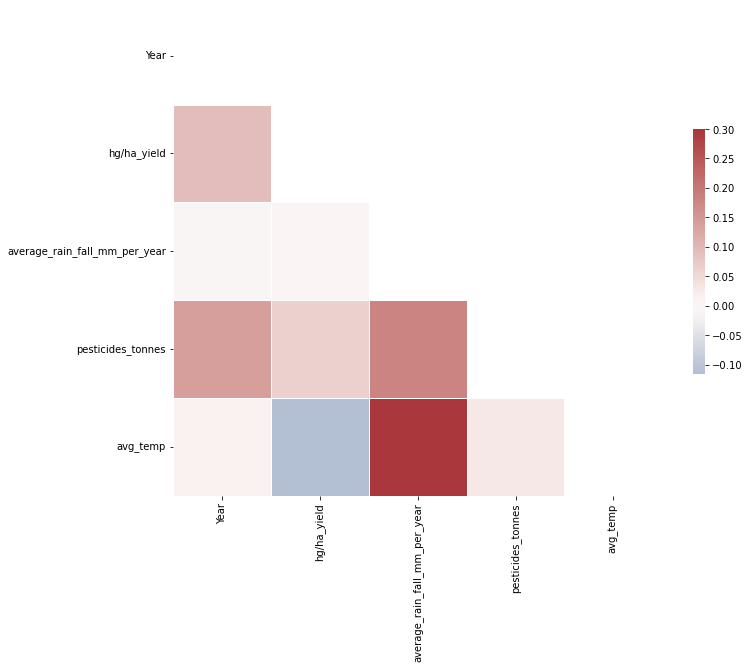

In [39]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

It can be seen from the above correlation map that there is no correlation between any of the colmuns in the dataframe. 

# Data Preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.  




In [88]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results. 


In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [91]:
features = features.drop(['Year'], axis=1)

In [92]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: float64(3), uint8(111)
memory usage: 3.9 MB


In [93]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.0,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



### Scaling Features: 

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

After dropping year column in addition to scaling all values in features, the resulting array will look something like this : 

In [95]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data: 

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset) 



In [118]:
from sklearn.model_selection import train_test_split

# Splitting data set - 25% test dataset and 75% 

train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=5)

print("x_train :",train_data.shape)
print("x_test :",test_data.shape)
print("y_train :",train_labels.shape)
print("y_test :",test_labels.shape)

x_train : (21181, 114)
x_test : (7061, 114)
y_train : (21181,)
y_test : (7061,)


In [119]:
print(train_data)
print(train_labels)

[[3.23612418e-01 3.93859654e-02 8.90971039e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.99121982e-01 1.18351301e-03 8.18739353e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.51458137e-01 7.24648100e-02 5.59795571e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.95798056e-02 2.03818630e-04 3.39011925e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.24365005e-02 4.02416719e-05 9.14139693e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.36218250e-01 2.05717303e-01 8.21465077e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
13634     88943
24366     22497
1341      19487
17393     38500
22371     12160
          ...  
3046     130631
26301      6107
20463    165000
18638    159665
2915     107920
Name: hg/ha_yield, Length: 21181, dtype: int64


# Linear Regression

In [50]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data,train_labels)

LinearRegression()

In [51]:
# Predicting the test Results 

lr_predict = model.predict(test_data)
lr_predict

array([  7932.5,  69753.5, -25712.5, ...,  46842. ,  10938.5,  -1220.5])

In [52]:
model.score(test_data,test_labels)

0.7449639335582788

In [53]:
from sklearn.metrics import r2_score
r = r2_score(test_labels,lr_predict)
print("R2 score : ",r)

R2 score :  0.7449639335582788


Text(0.5, 1.0, 'Linear Regression')

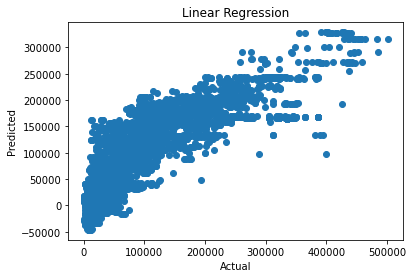

In [54]:
plt.scatter(test_labels,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 501)
model.fit(train_data,train_labels)
rf_predict = model.predict(test_data)
rf_predict

array([15026.33932136, 57127.97831005, 17862.77644711, ...,
       28523.09381238, 18675.92215569, 22434.9500998 ])

In [56]:
model.score(test_data,test_labels)

0.9742555653912223

In [57]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(test_labels,rf_predict)
print("R2 score : ",r1)

R2 score :  0.9742555653912223


In [58]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.7407781990960911


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random Forest Regression')

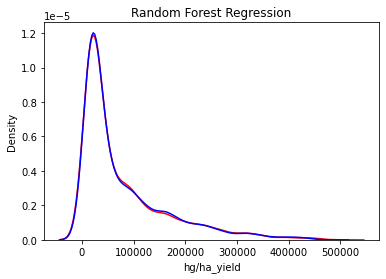

In [59]:
ax = sns.distplot(test_labels, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

# Hypertuning Random Forest using Grid Search CV

In [60]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Define Random Forest Regression model
model = RandomForestRegressor(n_estimators = 11)
model.fit(train_data,train_labels)
rf_predict = model.predict(test_data)
rf_predict

# Define hyperparameters to tune
hyperparameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15,95,96,97],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV object
grid_search = GridSearchCV(model, hyperparameters, cv=5)

# Fit GridSearchCV object to training data
grid_search.fit(train_data,train_labels)

# Print best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 96, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9741956017426983


In [61]:
# rf2 =  RandomForestRegressor(max_depth= 97, min_samples_leaf= 1, min_samples_split=5, n_estimators= 200)
# rf2.fit(train_data,train_labels)
# rf_predict = rf2.predict(test_data)
# rf_predict
# rf2.score(test_data,test_labels)

C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hypertuned Random Forest Regression')

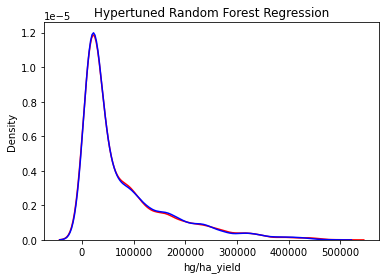

In [62]:
ax = sns.distplot(test_labels, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Hypertuned Random Forest Regression')

# Decision Tree

In [63]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(train_data,train_labels)

# Predicting results
decisiontree_predict = regressor.predict(test_data)
decisiontree_predict
print(train_data.shape)
print(train_labels.shape)

(21181, 114)
(21181,)


In [64]:
regressor.score(test_data,test_labels)

0.9595771298941649

In [65]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(test_labels,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9595771298941649


In [66]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.7407781990960911


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\aryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Decision Tree Regression')

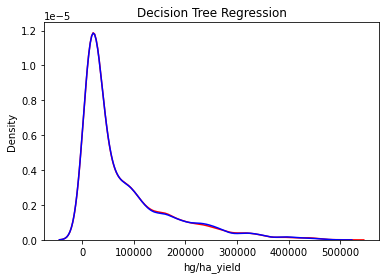

In [67]:
ax = sns.distplot(test_labels, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

# Model Comparison & Selection 


In [99]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

## Ensembling Random Forest and Gradient Boosting

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [101]:
model_train=list(map(compare_models,models)) 

In [102]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8947139845774157]
['RandomForestRegressor', 0.6734879242518254]
['SVR', -0.21920447613838445]
['DecisionTreeRegressor', 0.9601253888563391]


The evaluation metric is set based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model. **R^2** score shows how well terms (data points) fit a curve or line.

**R^2** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance. 

From results viewd above, **Decision Tree Regressor** has the highest R^2 score 0f **96%**, **GradientBoostingRegressor** comes second. 


 I'll also calculate **Adjusted R^2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2. 

In [103]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [104]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,66667,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23333,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12500,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,7000,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [105]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [106]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.216539,-0.567154,-0.494072,-0.056332,-0.064591,-0.075483,-0.116161,-0.048644,-0.187317,-0.057583,...,-0.279523,-0.413597,-0.140321,-0.418048,-0.371111,-0.347913,2.772699,-0.337245,-0.398926,-0.175373
1,-0.193234,-0.622933,0.599856,-0.056332,-0.064591,13.247956,-0.116161,-0.048644,-0.187317,-0.057583,...,-0.279523,-0.413597,-0.140321,-0.418048,-0.371111,-0.347913,-0.360659,2.965201,-0.398926,-0.175373
2,0.046978,-0.622127,0.465292,-0.056332,-0.064591,-0.075483,-0.116161,-0.048644,-0.187317,-0.057583,...,-0.279523,-0.413597,-0.140321,-0.418048,-0.371111,-0.347913,-0.360659,-0.337245,2.506731,-0.175373
3,2.957778,0.649841,0.226243,-0.056332,-0.064591,-0.075483,-0.116161,-0.048644,-0.187317,-0.057583,...,3.577527,-0.413597,-0.140321,-0.418048,-0.371111,-0.347913,-0.360659,-0.337245,-0.398926,-0.175373
4,-0.785285,0.839675,-0.454494,-0.056332,-0.064591,-0.075483,8.608712,-0.048644,-0.187317,-0.057583,...,3.577527,-0.413597,-0.140321,-0.418048,-0.371111,-0.347913,-0.360659,-0.337245,-0.398926,-0.175373


In [107]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.216539,-0.567154,-0.494072
1,-0.193234,-0.622933,0.599856
2,0.046978,-0.622127,0.465292
3,2.957778,0.649841,0.226243
4,-0.785285,0.839675,-0.454494


In [108]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.216539,-0.567154,-0.494072,Uruguay,Soybeans
1,-0.193234,-0.622933,0.599856,Angola,Sweet potatoes
2,0.046978,-0.622127,0.465292,Uganda,Wheat
3,2.957778,0.649841,0.226243,Colombia,Cassava
4,-0.785285,0.839675,-0.454494,Argentina,Cassava


In [109]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)
ensemble_pred = model.predict(test_data)
test_df["yield_predicted"]= ensemble_pred
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

#R2 Score
from sklearn.metrics import r2_score
r1 = r2_score(test_labels,ensemble_pred)
print("R2 score : ",r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

R2 score :  0.9601992301940683
Adj. R-Squared : 0.7407781990960911


In [1]:
# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

NameError: name 'plt' is not defined

## Ensembling Random Forest and SVR Regression

Ensemble MSE: 191026338.87776613
Ensemble MAE: 5753.090135081669
R2 score :  0.9741954514804235
Adj. R-Squared : 0.7407781990960911


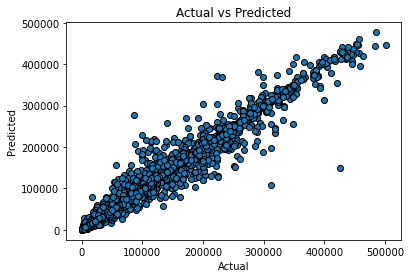

In [83]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Train SVR to extract features
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)  #radial basis function 
svr.fit(train_data, train_labels)
train_data_svr = svr.predict(train_data).reshape(-1, 1)
test_data_svr = svr.predict(test_data).reshape(-1, 1)

# Define and train CNN model
cnn = RandomForestRegressor(n_estimators=500, max_depth=95, random_state=42)
cnn.fit(train_data, train_labels)

# Ensemble model by concatenating features from SVR and CNN
train_data_ensemble = np.concatenate([cnn.predict(train_data).reshape(-1, 1), train_data_svr], axis=1)
test_data_ensemble = np.concatenate([cnn.predict(test_data).reshape(-1, 1), test_data_svr], axis=1)

# Train the ensemble model using a simple linear regression model
from sklearn.linear_model import LinearRegression
ensemble = LinearRegression()
ensemble.fit(train_data_ensemble, train_labels)

# Evaluate the ensemble model
y_pred = ensemble.predict(test_data_ensemble)
print("Ensemble MSE:", mean_squared_error(test_labels, y_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, y_pred))


#R2 Score
from sklearn.metrics import r2_score
r1 = r2_score(test_labels,y_pred)
print("R2 score : ",r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))


from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= y_pred
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")

# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()


**We train a Support Vector Regression (SVR) model to extract features from the input data, and a Random Forest Regressor (RFR) model as a simple CNN to learn complex patterns and relationships within the data.**

In this example code, we first generate a random dataset with 1000 samples and 10 features, where 5 features are informative. We split the data into training and test sets and scale the features using a StandardScaler.

We train a Support Vector Regression (SVR) model to extract features from the input data, and a Random Forest Regressor (RFR) model as a simple CNN to learn complex patterns and relationships within the data.

We predict the output of the RFR model for each sample in the training and test data, and use these features to concatenate with the output of the SVR model to use as input to the ensemble model.

We concatenate the output of the RFR model with the features extracted by the SVR model and use this as input to a simple linear regression model with a final output of 1.

We compile and train the ensemble model using both the input data and the features extracted from SVR and RFR. Finally, we evaluate the ensemble model using the test data and print the mean squared error and mean absolute error scores.

## Ensembling Random Forest and CNN

221/221 [==============================] - 0s 2ms/step
Ensemble MSE: 191431584.58807895
Ensemble MAE: 5797.666086356401
R2 score :  0.9741407093822628
Adj. R-Squared : 0.7407781990960911


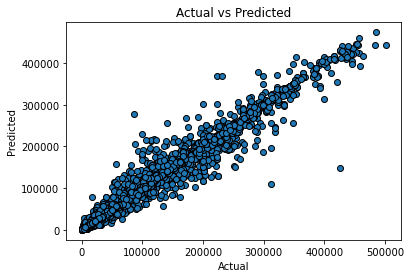

In [85]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# Load and preprocess data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))

# Train CNN model
cnn.compile(optimizer='adam', loss='mse')
train_data_cnn = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data_cnn = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
cnn.fit(train_data_cnn, train_labels, epochs=10, batch_size=32, verbose=0)

# Train RFR model
rfr = RandomForestRegressor(n_estimators=500, max_depth=95, random_state=42)
rfr.fit(train_data, train_labels)

# Ensemble model by concatenating features from RFR and CNN
train_data_ensemble = np.concatenate([rfr.predict(train_data).reshape(-1, 1), cnn.predict(train_data_cnn)], axis=1)
test_data_ensemble = np.concatenate([rfr.predict(test_data).reshape(-1, 1), cnn.predict(test_data_cnn)], axis=1)

# Train the ensemble model using a simple linear regression model
from sklearn.linear_model import LinearRegression
ensemble = LinearRegression()
ensemble.fit(train_data_ensemble, train_labels)

# Evaluate the ensemble model
y_pred = ensemble.predict(test_data_ensemble)
print("Ensemble MSE:", mean_squared_error(test_labels, y_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, y_pred))

#R2 Score
from sklearn.metrics import r2_score
r1 = r2_score(test_labels,y_pred)
print("R2 score : ",r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))


from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= y_pred
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")

# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In this example code, we load the MNIST dataset and preprocess it by normalizing the pixel values and converting the target labels to one-hot encoded vectors.

We define a CNN model with two convolution layers, two max pooling layers, and two dense layers. We compile the model with the Adam optimizer and categorical cross-entropy loss function.

We train the model using the fit method, passing in the training data and labels, the number of epochs, batch size, and validation data. The fit method updates the model parameters by minimizing the loss function using backpropagation and gradient descent.

## Ensembling Random Forest, SVM and CNN

221/221 [==============================] - 1s 5ms/step
Ensemble MSE: tf.Tensor(191431584.588079, shape=(), dtype=float64)
Ensemble MAE: 5797.666086356401
R2 score :  0.9741407093822628
Adj. R-Squared : 0.7407781990960911


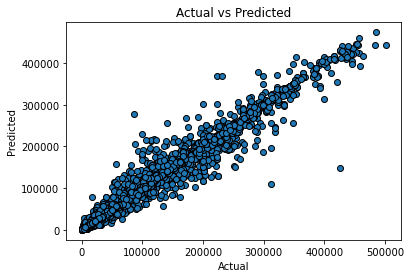

In [115]:
# Import necessary libraries
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
from keras.losses import mean_squared_error
from keras.datasets import mnist

# Load and preprocess data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Define CNN model
cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))

# Train CNN model
cnn.compile(optimizer='adam', loss='mse')
train_data_cnn = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data_cnn = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
cnn.fit(train_data_cnn, train_labels, epochs=10, batch_size=32, verbose=0)

# Train RFR model
rfr = RandomForestRegressor(n_estimators=500, max_depth=95, random_state=42)
rfr.fit(train_data, train_labels)

# Define SVM Regression model
svm_model = SVR(kernel='linear')

# Train SVM Regression model
svm_model.fit(train_data.reshape(train_data.shape[0], -1), train_labels)

# Ensemble model by concatenating features from RFR and CNN
# Predict using Random Forest Regression model
rf_pred = rfr.predict(test_data.reshape(test_data.shape[0], -1))

# Predict using SVM Regression model
svm_pred = svm_model.predict(test_data.reshape(test_data.shape[0], -1))

# Predict using CNN model
cnn_pred = cnn.predict(test_data)

# Ensemble predictions using weighted averaging
y_pred = (0.34 * rf_pred) + (0.33 * svm_pred) + (0.33 * cnn_pred)



# Evaluate the ensemble model
y_pred = ensemble.predict(test_data_ensemble)
print("Ensemble MSE:", mean_squared_error(test_labels, y_pred))
print("Ensemble MAE:", mean_absolute_error(test_labels, y_pred))

#R2 Score
from sklearn.metrics import r2_score
r1 = r2_score(test_labels,y_pred)
print("R2 score : ",r1)

# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r)*(len(test_labels)-1)/(len(test_labels)-test_data.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))


from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= y_pred
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")

# So let's run the model actual values against the predicted ones 

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

# Ensemble Model for Naive Byes and CNN

In [126]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D


# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(train_data, train_labels)

# Train the CNN model
#input_shape = train_data.shape[1:]
num_classes = len(np.unique(train_labels))

cnn = Sequential()
cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=6, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=9, activation='relu', input_shape=(114, 1)))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(1))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Convert labels to one-hot encoding
# train_labels_onehot = keras.utils.to_categorical(train_labels, num_classes)
# test_labels_onehot = keras.utils.to_categorical(test_labels, num_classes)

# cnn.fit(train_data, train_labels_onehot, epochs=10, batch_size=32, validation_data=(test_data, test_labels_onehot))

# Train CNN model
cnn.compile(optimizer='adam', loss='mse')
train_data_cnn = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data_cnn = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
cnn.fit(train_data_cnn, train_labels, epochs=10, batch_size=32, verbose=0)

# Combine the predictions of the two models using a voting classifier
nb_predictions = nb_model.predict(test_data)
cnn_predictions = cnn.predict(test_data)
combined_predictions = np.argmax(nb_predictions, axis=0) + np.argmax(cnn_predictions, axis=0)
ensemble_predictions = np.round(combined_predictions / 2)

# Calculate accuracy of the ensemble model
ensemble_accuracy = accuracy_score(test_labels, ensemble_predictions)
print("Ensemble Model Accuracy:", ensemble_accuracy)


221/221 [==============================] - 1s 4ms/step


ValueError: Found input variables with inconsistent numbers of samples: [7061, 1]